In [6]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import pandas as pd

In [7]:
# color_list = {0: '#1f77b4', 1: '#ff7f0e', 2: '#2ca02c', 3: '#d62728', 4: '#9467bd', 5: '#8c564b', 6: '#e377c2', 7: '#7f7f7f', 8: '#bcbd22', 9: '#17becf', -1: '#000000', -2: '#ff0000', -3: '#000000', -4: '#000000', -5: '#000000'}
color_list = {0: 'b', 1: 'b', 2: 'b', 3: 'b', 4: 'b', 5: 'b', 6: 'b', 7: 'b', 8: 'b', 9: 'b', -1: 'g', -2: 'r', -3: 'c', -4: 'm', -5: 'k'}
features_dir = '../features/'

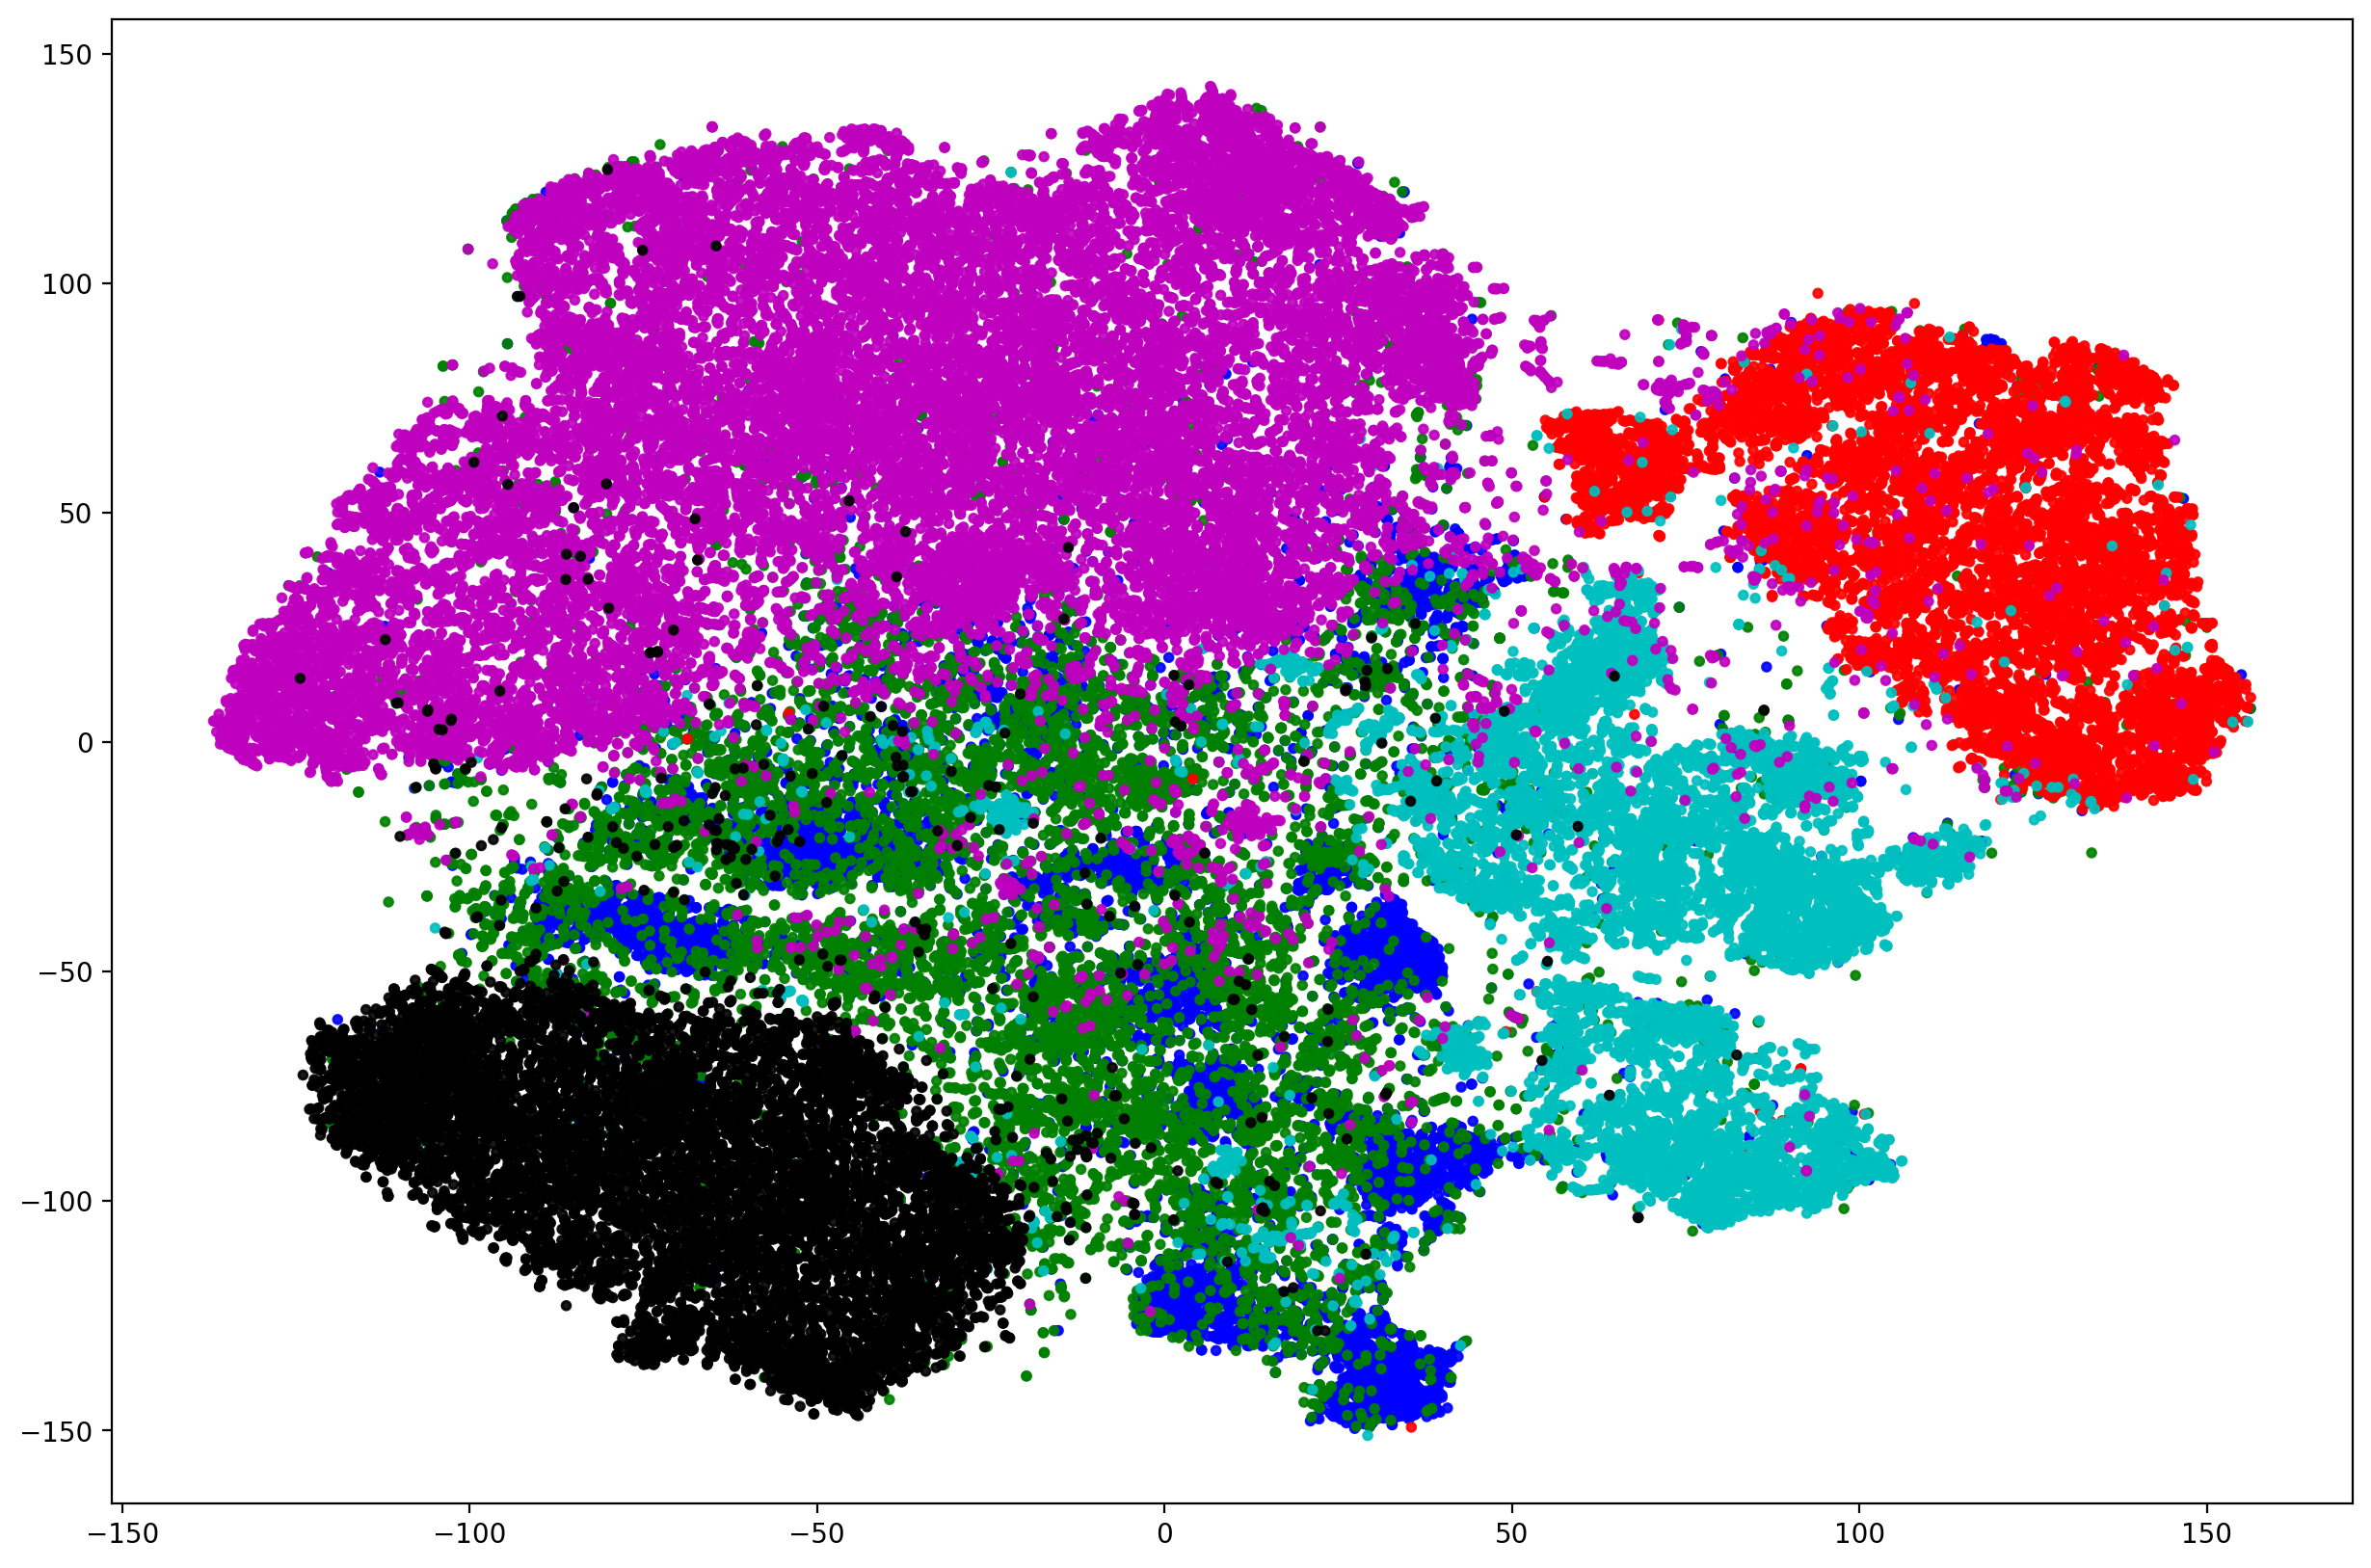

In [8]:
# Plot data with given mask.
data = np.load(f'{features_dir}resnet18_cifar10_cifar100_mnist_fashionmnist_svhn_tin_tsne.npz')['data']
labels = np.load(f'{features_dir}resnet18_cifar10_cifar100_mnist_fashionmnist_svhn_tin_tsne.npz')['labels']
mask = (labels >=0) # cifar10

figure(figsize=(15,10), dpi=200)
plt.scatter(data[:,0][mask], data[:,1][mask], c=pd.Series(labels[mask]).map(color_list), s=10, alpha=0.9)

0.1204886
0.23336658
0.2543544
0.27009818
0.22488427
0.2806728


<Figure size 6000x600 with 0 Axes>

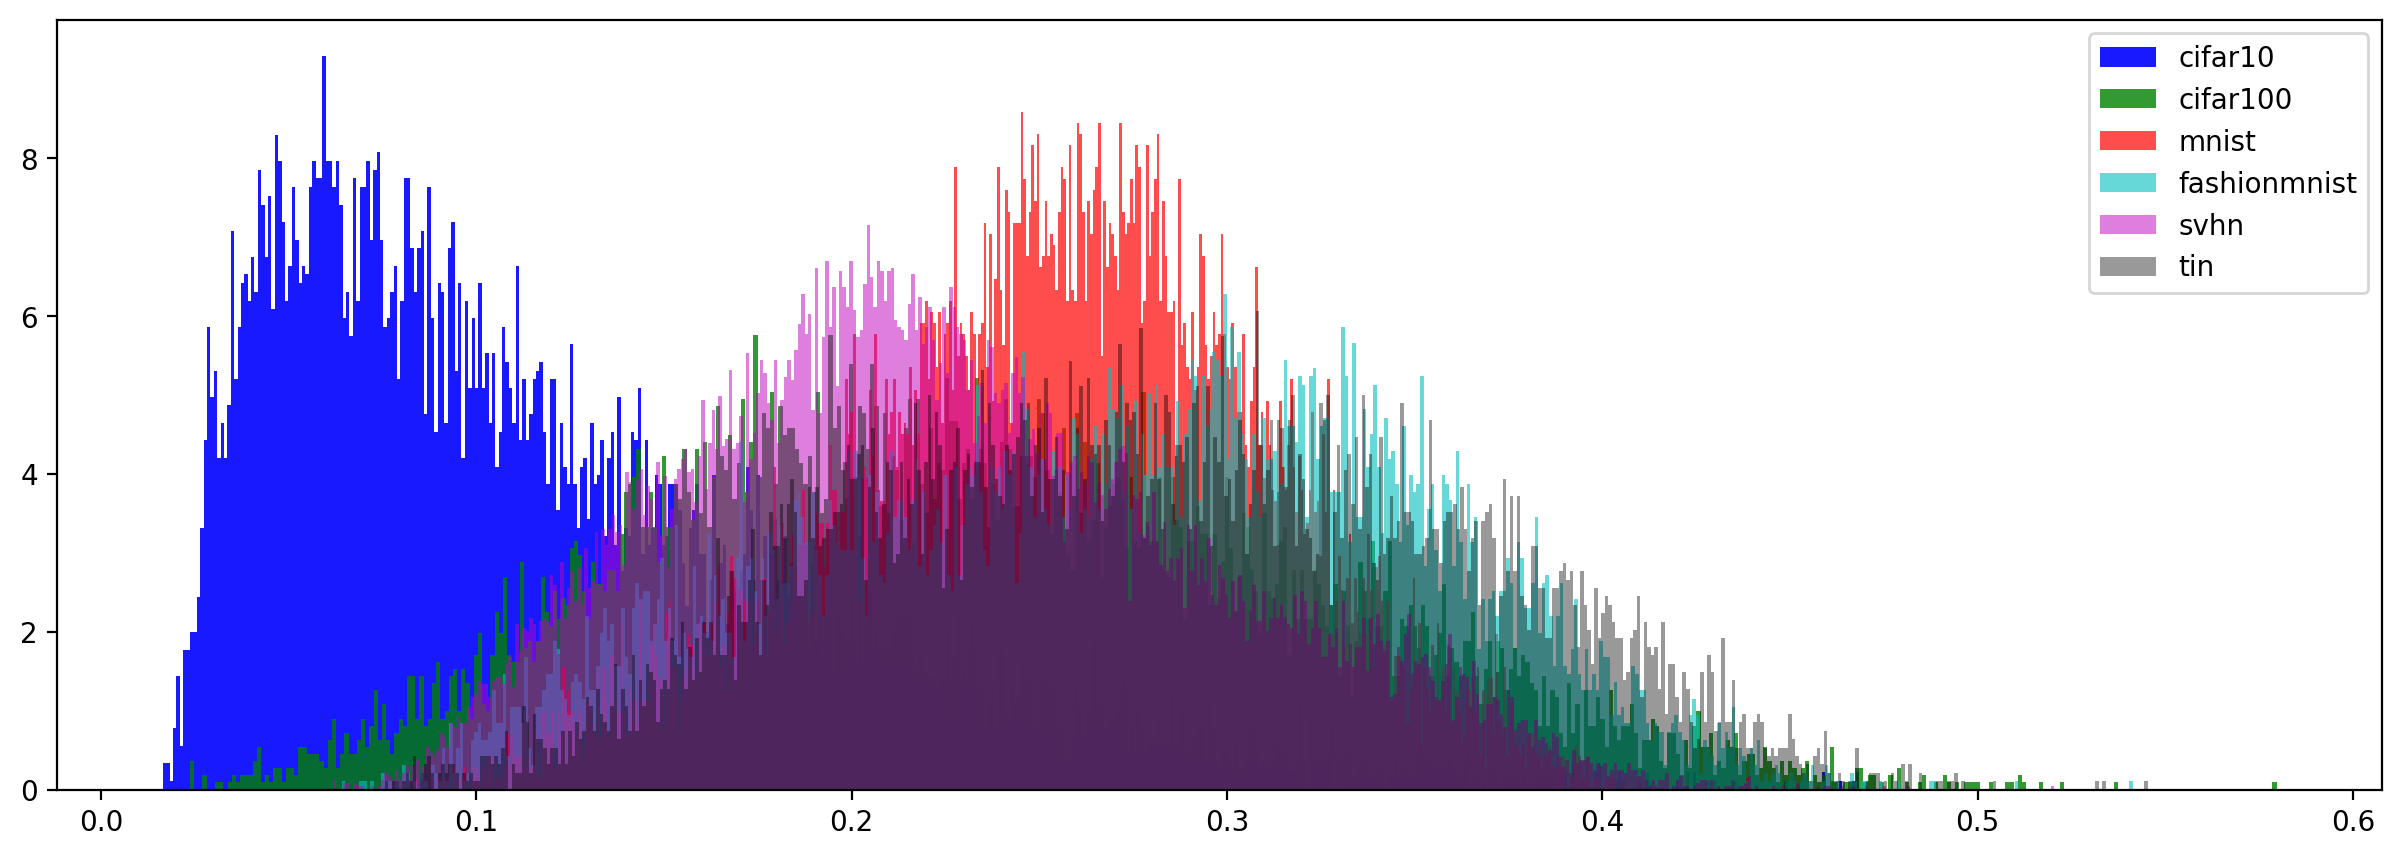

In [10]:
# Plot histograms of distance of data with given mask.
file = f'{features_dir}resnet18_cifar10_cifar100_mnist_fashionmnist_svhn_tin_knn.npz'
data = np.load(file)['data']
labels = np.load(file)['labels']
datasets = file.split('_')[1:-1]
plt.figure(figsize=(30, 3), dpi=200)

n_bins = 500

figure(figsize=(15,5), dpi=200)

for i in range(6):
    if i == 0:
        mask = (labels >=0) # cifar10
        facecolor = color_list[0]
    else:
        mask = labels == -i
        facecolor = color_list[-i]

    mean = np.mean(data[mask])
    print(mean)
    plt.axvline(x=mean, color=facecolor)
    plt.hist(data[mask], n_bins, density=True, 
            weights=np.ones(len(data[mask])) / len(data[mask]), 
            facecolor=facecolor, alpha=0.9 - 0.1*i, label=datasets[i])

plt.legend()